<a href="https://colab.research.google.com/github/whyeon92/ESAA_YB/blob/Online_Quiz/ESAA_Online_Quiz0517_Regression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 규제 선형 회귀 모델/ 회귀 트리**
- 릿지 회귀모델 및 회귀 트리를 이용하여 전복의 나이를 예측해 보세요.

- 전복의 ‘성별’, ‘키’, ‘지름’, ‘높이’, ‘전체무게’, ‘몸통무게’, ‘내장무게’, ‘껍질무게’를 이용해 ‘껍질의 고리수’를 예측한 뒤, **예측된 ‘껍질의 고리수’에 1.5를 더하면 전복의 나이**가 됩니다.

In [1]:
#구글 코랩 환경 사용으로 드라이브 마운트 및 디렉터리 설정
from google.colab import drive
drive.mount('/content/gdrive/')

path = "/content/gdrive/My Drive/ESAAData/"

Mounted at /content/gdrive/


In [27]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

### 1) 데이터 불러오기 및 데이터 선택

In [28]:
# 데이터 로드
data = pd.read_csv(path + "abalone.csv")

# 성별 M은 Male, F는 Female, I는 Infant 이므로 따로 열 만들기
for label in "MFI":
    data[label] = data["Sex"] == label
data.drop('Sex', axis=1, inplace=True)

# X,y 데이터 선택
y = data.Rings.values
data.drop('Rings', axis=1, inplace=True)

X = data.values.astype(float)

## 2) train/test 분리
: 테스트 셋과 데이터 셋을 7:3 비율로 분리하세요.

In [29]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split

In [30]:
# train과 test set 분리 (train:test = 7:3 비율로)
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.3)

## 3) 릿지 모델을 이용한 모델링
: 릿지 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

 3-1) 릿지모델 생성, 교차검증, 평가에 필요한 모듈을 불러오세요.

In [31]:
#필요한 모듈 불러오기
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

3-2) 릿지 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요. 릿지 모델 생성 시  alpha는 0.3으로 설정합니다. (교차 검증 하지 않습니다.)

In [32]:
#릿지모델 생성 및 훈련
ridge = Ridge(alpha = 0.3)
ridge.fit(X_train, y_train)
#예측값 구하기
ridge_pred = ridge.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
ridge_fin = ridge_pred + 1.5

#MSE와 RMSE구하기
ridge_mse = mean_squared_error(y_test, ridge_fin)
ridge_rmse = np.sqrt(ridge_mse)

In [33]:
print(ridge_mse, ridge_rmse)

7.264604902791952 2.695293101462613


3-3) 교차검증을 이용하여 0, 0.1, 1, 10, 100 중  모델 성능이 가장 좋게 나오는 (rmse가 최소가 되는) alpha를 구하세요.

In [34]:
# 주어진 alpha
alphas=[0, 0.1, 1, 10, 100]

In [35]:
#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas:
  ridge = Ridge(alpha = alpha)
  score = cross_val_score(ridge, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)
  print("alpha = {0}일 때 rmse 값 = {1}".format(alpha, -score))
  #cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
  print("alpha = {0}일 때 평균 rmse 값 = {1}".format(alpha, np.mean(-score)))

alpha = 0일 때 rmse 값 = [4.74175228 4.38464483 4.51035511 4.73386138 5.03718609]
alpha = 0일 때 평균 rmse 값 = 4.68155993687694
alpha = 0.1일 때 rmse 값 = [4.75317588 4.36549451 4.5302371  4.71046189 5.03373868]
alpha = 0.1일 때 평균 rmse 값 = 4.678621613118418
alpha = 1일 때 rmse 값 = [4.85735372 4.36791707 4.66929103 4.76030942 5.05875315]
alpha = 1일 때 평균 rmse 값 = 4.742724878525216
alpha = 10일 때 rmse 값 = [5.58063568 4.97208275 5.50910507 5.49241908 5.65235611]
alpha = 10일 때 평균 rmse 값 = 5.441319736814872
alpha = 100일 때 rmse 값 = [6.82897044 6.2259906  6.98098327 6.76257285 6.8809855 ]
alpha = 100일 때 평균 rmse 값 = 6.735900532756406


## 4) XGBRegressor을 이용한 모델링
: XGBRegressor 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

4-1) XGBRegressor 훈련, 평가에 필요한 모듈을 불러오세요.

In [36]:
# 필요한 모듈 임포트
from xgboost import XGBRegressor

4-2) XGBregressor 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요.

In [37]:
#모델 생성 및 훈련
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

#예측값 구하기
xgb_pred = xgb_reg.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
xgb_fin = xgb_pred + 1.5

#MSE와 RMSE 구하기
xgb_mse = mean_squared_error(y_test, xgb_fin)
xgb_rmse = np.sqrt(xgb_mse)

In [38]:
print(xgb_mse, xgb_rmse)

7.811209123957768 2.794854043408666


4-3) 생성한 모델의 피처 중요도를 시각화해보세요.

In [39]:
xgb_reg.feature_importances_

array([0.02834391, 0.0423419 , 0.04469541, 0.06364302, 0.12303857,
       0.04661774, 0.39047366, 0.03526063, 0.0435999 , 0.18198526],
      dtype=float32)

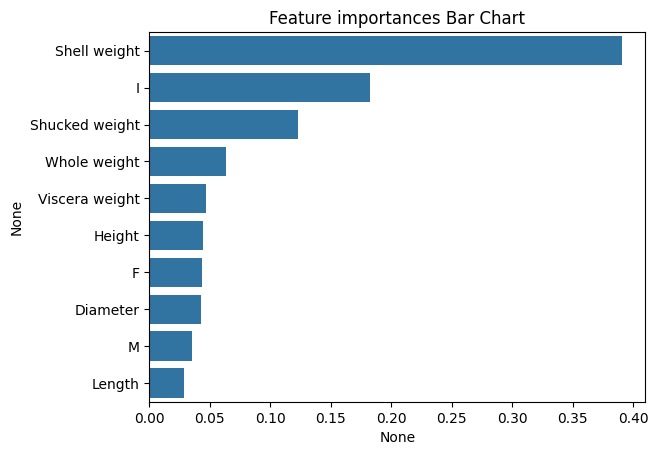

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ftr_importances = pd.Series(xgb_reg.feature_importances_, index = X_train.columns)
ftr_importances_sorted = ftr_importances.sort_values(ascending = False)
plt.title('Feature importances Bar Chart')
sns.barplot(x = ftr_importances_sorted, y = ftr_importances_sorted.index)
plt.show()

---

# **2. 로지스틱 회귀분석**
load_wine() 함수를 이용하여 와인 데이터를 다항분류하는 로지스틱 회귀모델을 생성하세요.

In [42]:
# 필요한 모듈 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 1) 데이터 불러오기 및 변수 선택

In [43]:
wine = load_wine()

wine_x = wine.data # x변수
wine_y = wine.target # y변수

In [9]:
wine_y #멀티 레이블 분류

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

## 2) train/test 셋 분리

In [44]:
x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.3, random_state=123)

x_train.shape
y_train.shape

(124,)

## 3) 로지스틱 회귀모델을 이용한 모델링

3-1) 로지스틱 회귀모델을 생성하여 훈련하세요.

In [45]:
LR = LogisticRegression()
LR.fit(x_train, y_train)

LogisticRegression()

3-2) 회귀 모델의 기울기와 절편을 구하세요.

In [46]:
#기울기
LR.coef_

array([[-1.99751227e-01,  3.65450758e-01,  1.49472196e-01,
        -1.88027165e-01, -2.28495279e-02,  1.95456589e-01,
         4.66701510e-01, -1.66796736e-02,  8.23897555e-02,
         6.75012051e-02, -1.92621931e-02,  2.94915906e-01,
         7.42523456e-03],
       [ 5.96476071e-01, -7.88673050e-01, -1.26181507e-01,
         2.12254576e-01, -1.13504552e-02,  3.15786080e-01,
         3.55148166e-01,  3.34675705e-02,  2.79035814e-01,
        -1.17202539e+00,  2.61165812e-01,  4.64731786e-01,
        -8.33633370e-03],
       [-3.96724844e-01,  4.23222292e-01, -2.32906893e-02,
        -2.42274112e-02,  3.41999831e-02, -5.11242669e-01,
        -8.21849677e-01, -1.67878969e-02, -3.61425569e-01,
         1.10452419e+00, -2.41903619e-01, -7.59647692e-01,
         9.11099142e-04]])

In [47]:
#절편
LR.intercept_

array([-0.04177839,  0.0955105 , -0.05373211])

3-3) 모델의 정확도를 구하세요.

In [49]:
#모델의 예측값 구하기
pred = LR.predict(x_test)

#모델의 정확도 구하기
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)


0.9629629629629629